In [61]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from hiive.mdptoolbox import example, mdp 
from hiive.mdptoolbox.mdp import ValueIteration, PolicyIteration, QLearning
import seaborn as sns

In [62]:
import warnings
warnings.filterwarnings("ignore")
np.random.seed(36)

In [63]:
p,r= example.forest(S=900, r1=4, r2=2, p=0.1)

In [64]:
colors = {
    0: 'g',
    1: 'b'
}

labels = {
    0: 'W', # wait
    1: 'C', # cut
}


In [65]:
def plot_env(policy, title='Forest Management'):
    nrows = 30
    ncols = 30
    
    # reshape policy array to be 2-D (nrows x ncols)
    policy = np.array(list(policy)).reshape(nrows, ncols)
    
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, xlim=(-.01, ncols+0.01), ylim = (-.01, nrows+0.01))
    
    for i in range(nrows):
        for j in range(ncols):
            y = 30 - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1, linewidth=1, edgecolor='k')
            p.set_facecolor(colors[policy[i,j]])
            ax.add_patch(p)
            ax.text(x+0.5, y+0.5, labels[policy[i, j]], ha='center', va='center',size=9, color='w')
    if title:
        ax.set_title(title, fontsize=16)
    plt.show()

In [66]:
def Value_Iteration(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    iterations = []
    times = []
    policy_list = []
    gammas = [0.1, 0.3, 0.5, 0.7, 0.9, 0.96, 0.99]
    for gamma in gammas:
        vi = mdp.ValueIteration(p, r, gamma, epsilon = 1e-2, max_iter=1000)
        vi.run()
        vi.run_stats
        policy_list.append(vi.policy)
        iterations.append([item['Iteration'] for item in vi.run_stats])
        max_vs.append([item['Max V'] for item in vi.run_stats])
        mean_vs.append([item['Mean V'] for item in vi.run_stats])
        errors.append([item['Error'] for item in vi.run_stats])
        times.append([item['Time'] for item in vi.run_stats])
    max_value = max(max_vs)
    print("Best Reward = " + str(max_value[-1]))
    idx = max_vs.index(max_value)
    plot_env(policy_list[idx], title='Forest Management with Value Iteration')
    
    f, ax = plt.subplots(1,4, figsize=(24,5))
# "Max V"
    for i in range(len(max_vs)):
        ax[0].plot(iterations[i], max_vs[i],
                    alpha=0.6,
                    marker='s', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel("Number of Iterations")
    ax[0].set_ylabel("Max V")

# "Mean V"
    for i in range(len(mean_vs)):
        ax[1].plot(iterations[i], mean_vs[i],
                    alpha=0.6,
                    marker='o', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel("Number of Iterations")
    ax[1].set_ylabel("Mean V")
    
# "Error"
    for i in range(len(errors)):
        ax[2].plot(iterations[i], errors[i],
                    alpha=0.6,
                    marker='^', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[2].legend(fontsize=16)
    ax[2].set_xlabel("Number of Iterations")
    ax[2].set_ylabel("Error")

# "Time"
    for i in range(len(times)):
        ax[3].plot(iterations[i], times[i],
                    alpha=0.6,
                    marker='<', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[3].legend(fontsize=16)
    ax[3].set_xlabel("Number of Iterations")
    ax[3].set_ylabel("Time")

    plt.plot()


Best Reward = 60.701641491614865


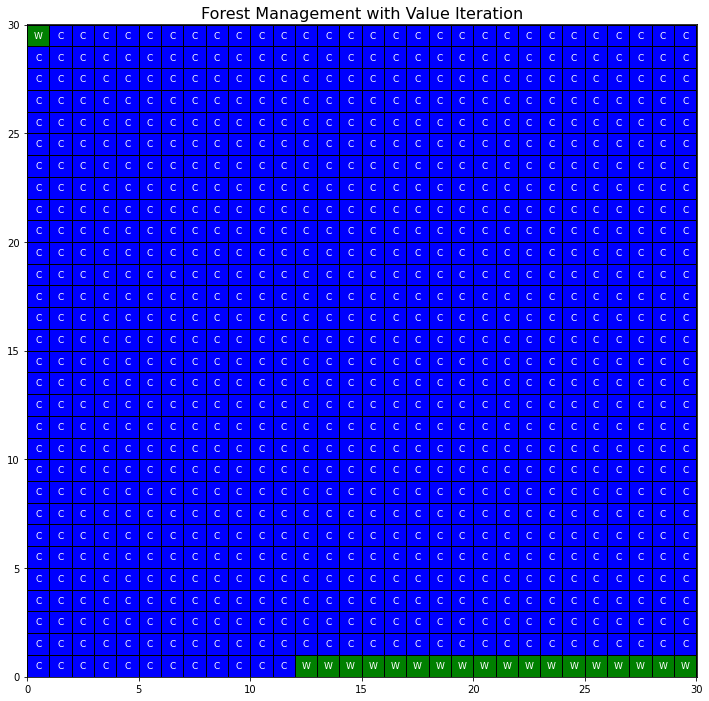

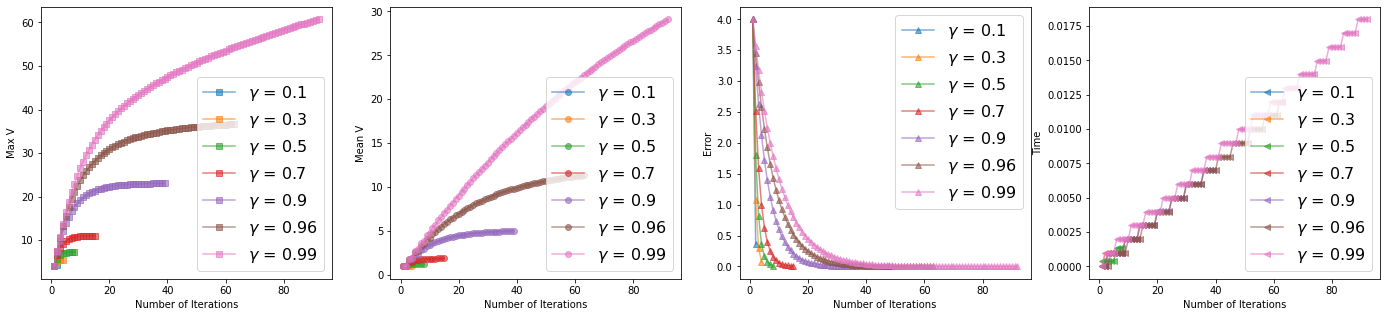

In [67]:
Value_Iteration(p, r)

In [68]:
def Policy_Iteration(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    iterations = []
    times = []
    policy_list = []
    gammas = [0.1, 0.3, 0.5, 0.7, 0.9, 0.96, 0.99]
    for gamma in gammas:
        pi = mdp.PolicyIteration(p, r, gamma, max_iter=1000)
        pi.run()
        pi.run_stats
        policy_list.append(pi.policy)
        iterations.append([item['Iteration'] for item in pi.run_stats])
        max_vs.append([item['Max V'] for item in pi.run_stats])
        mean_vs.append([item['Mean V'] for item in pi.run_stats])
        errors.append([item['Error'] for item in pi.run_stats])
        times.append([item['Time'] for item in pi.run_stats])

    max_value = max(max_vs)
    print("Best Reward = " + str(max_value[-1]))
    idx = max_vs.index(max_value)
    plot_env(policy_list[idx], title='Forest Management with Policy Iteration')

    f, ax = plt.subplots(1,4, figsize=(24,5))
# "Max V"
    for i in range(len(max_vs)):
        ax[0].plot(iterations[i], max_vs[i],
                    alpha=0.6,
                    marker='s', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel("Number of Iterations")
    ax[0].set_ylabel("Max V")

# "Mean V"
    for i in range(len(mean_vs)):
        ax[1].plot(iterations[i], mean_vs[i],
                    alpha=0.6,
                    marker='o', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel("Number of Iterations")
    ax[1].set_ylabel("Mean V")
    
# "Error"
    for i in range(len(errors)):
        ax[2].plot(iterations[i], errors[i],
                    alpha=0.6,
                    marker='^', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[2].legend(fontsize=16)
    ax[2].set_xlabel("Number of Iterations")
    ax[2].set_ylabel("Error")

# "Time"
    for i in range(len(times)):
        ax[3].plot(iterations[i], times[i],
                    alpha=0.6,
                    marker='<', markersize = 6,
                    label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[3].legend(fontsize=16)
    ax[3].set_xlabel("Number of Iterations")
    ax[3].set_ylabel("Time")

    plt.plot()

Best Reward = 79.49242913074468


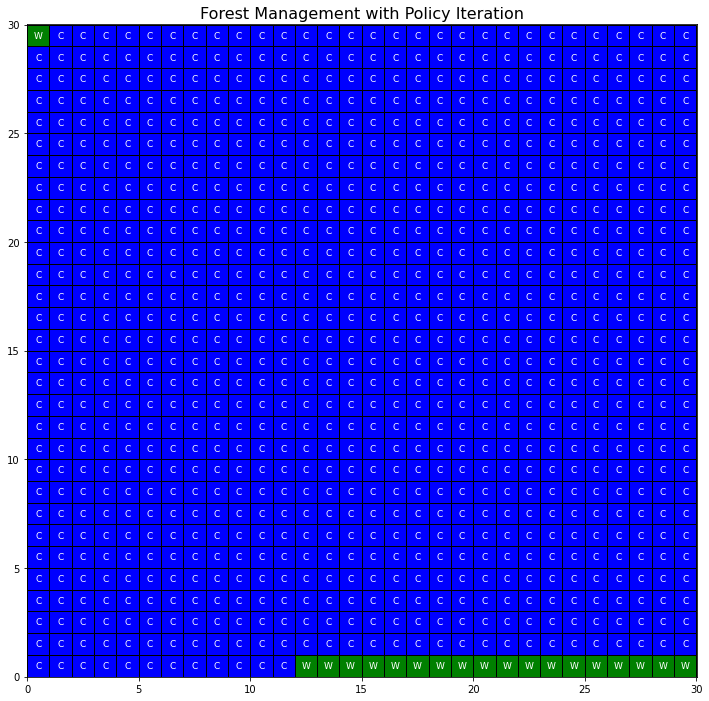

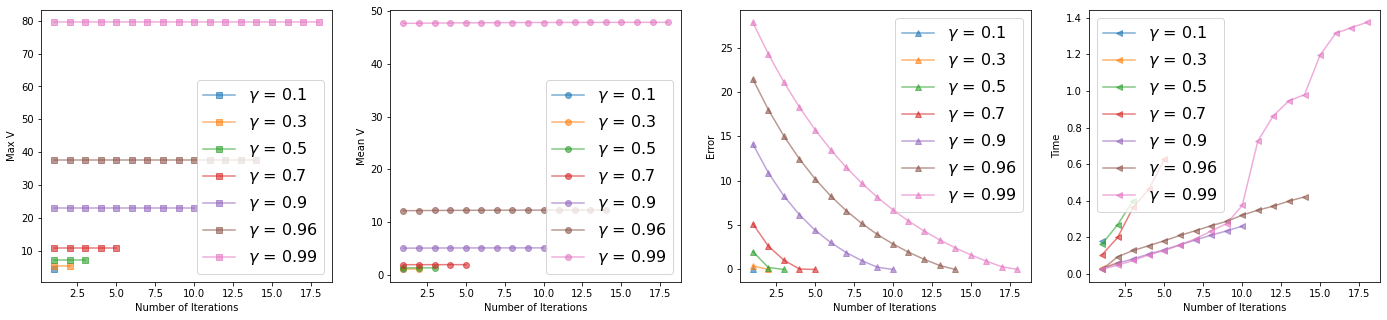

In [69]:
Policy_Iteration(p, r)

In [78]:
def QLearning_Gamma(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    iterations = []
    times = []
    policy_list = []
    gammas = [0.3, 0.5, 0.6, 0.8, 0.9, 0.96, 0.99]
    for gamma in gammas:
        ql = mdp.QLearning(p, r, gamma, alpha = 0.1, alpha_decay = 0.99, epsilon = 1, epsilon_decay = 0.99, n_iter=3e6)
        ql.run()
        ql.run_stats
        policy_list.append(ql.policy)
        iterations.append([item['Iteration'] for item in ql.run_stats])
        max_vs.append([item['Max V'] for item in ql.run_stats])
        mean_vs.append([item['Mean V'] for item in ql.run_stats])
        errors.append([item['Error'] for item in ql.run_stats])
        times.append([item['Time'] for item in ql.run_stats])

    max_value = max(max_vs)
    print("Best Reward = " + str(max_value[-1]))
    idx = max_vs.index(max_value)
    plot_env(policy_list[idx], title='Forest Management with Q-Learning_Gamma')

    f, ax = plt.subplots(1,4, figsize=(24,5))
# "Max V"   
    for i in range(len(max_vs)):
        ax[0].plot(iterations[i], max_vs[i], alpha=0.6, marker='s', markersize=6, label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel("Number of Iterations")
    ax[0].set_ylabel("Max V")

# "Mean V"  
    for i in range(len(mean_vs)):
        ax[1].plot(iterations[i], mean_vs[i], alpha=0.6, marker='o', markersize=6, label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel("Number of Iterations")
    ax[1].set_ylabel("Mean V")

# "Error"
    for i in range(len(errors)):
        ax[2].scatter(iterations[i], errors[i], alpha=0.6, marker='^', s=6, label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[2].legend(fontsize=16)
    ax[2].set_xlabel("Number of Iterations")
    ax[2].set_ylabel("Error")

# "Time"
    for i in range(len(times)):
        ax[3].plot(iterations[i], times[i], alpha=0.6, marker='<', markersize=6, label="$\gamma$ = {}".format(np.round(gammas[i],3)))
    ax[3].legend(fontsize=16)
    ax[3].set_xlabel("Number of Iterations")
    ax[3].set_ylabel("Time")

    plt.plot()

Best Reward = 47.652121880387355


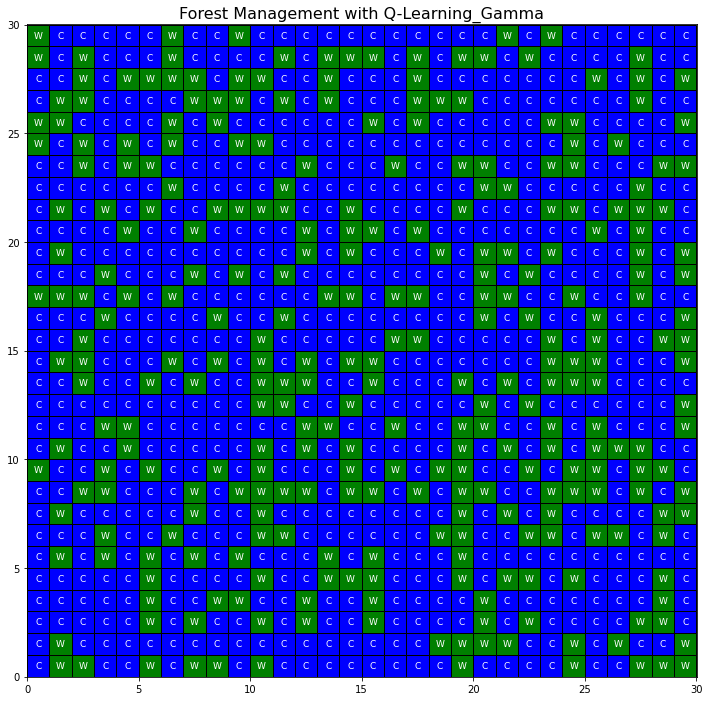

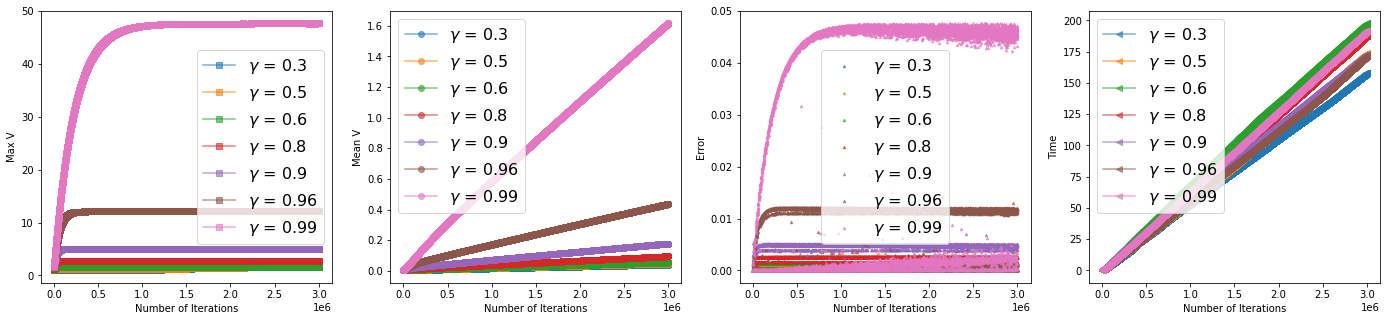

In [79]:
QLearning_Gamma(p, r)

In [80]:
def QLearning_Alpha(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    iterations = []
    times = []
    policy_list = []
    alphas = [0.1, 0.3, 0.5, 0.7, 0.9]
    for alpha in alphas:
        ql = mdp.QLearning(p, r, 0.99, alpha = alpha, alpha_decay = 0.99, epsilon = 1, epsilon_decay = 0.99, n_iter=3e6)
        ql.run()
        ql.run_stats
        policy_list.append(ql.policy)
        iterations.append([item['Iteration'] for item in ql.run_stats])
        max_vs.append([item['Max V'] for item in ql.run_stats])
        mean_vs.append([item['Mean V'] for item in ql.run_stats])
        errors.append([item['Error'] for item in ql.run_stats])
        times.append([item['Time'] for item in ql.run_stats])

    max_value = max(max_vs)
    print("Best Reward = " + str(max_value[-1]))
    idx = max_vs.index(max_value)
    plot_env(policy_list[idx], title='Forest Management with Q-Learning_Alpha')

    f, ax = plt.subplots(1,4, figsize=(24,6))
# "Max V"
    for i in range(len(max_vs)):
        ax[0].plot(iterations[i], max_vs[i], alpha=0.6, marker='s', markersize=6, label="$\\alpha$ = {}".format(np.round(alphas[i],3)))
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel("Number of Iterations")
    ax[0].set_ylabel("Max V")

# "Mean V"
    for i in range(len(mean_vs)):
        ax[1].plot(iterations[i], mean_vs[i], alpha=0.6, marker='o', markersize=6, label="$\\alpha$ = {}".format(np.round(alphas[i],3)))
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel("Number of Iterations")
    ax[1].set_ylabel("Mean V")

# "Error"
    for i in range(len(errors)):
        ax[2].scatter(iterations[i], errors[i], alpha=0.6, marker='^', s=6, label="$\\alpha$ = {}".format(np.round(alphas[i],3)))
    ax[2].legend(fontsize=16)
    ax[2].set_xlabel("Number of Iterations")
    ax[2].set_ylabel("Error")

# "Time"
    for i in range(len(times)):
        ax[3].plot(iterations[i], times[i], alpha=0.6, marker='<', markersize=6, label="$\\alpha$ = {}".format(np.round(alphas[i],3)))
    ax[3].legend(fontsize=16)
    ax[3].set_xlabel("Number of Iterations")
    ax[3].set_ylabel("Time")

    plt.plot()

Best Reward = 47.66694124997415


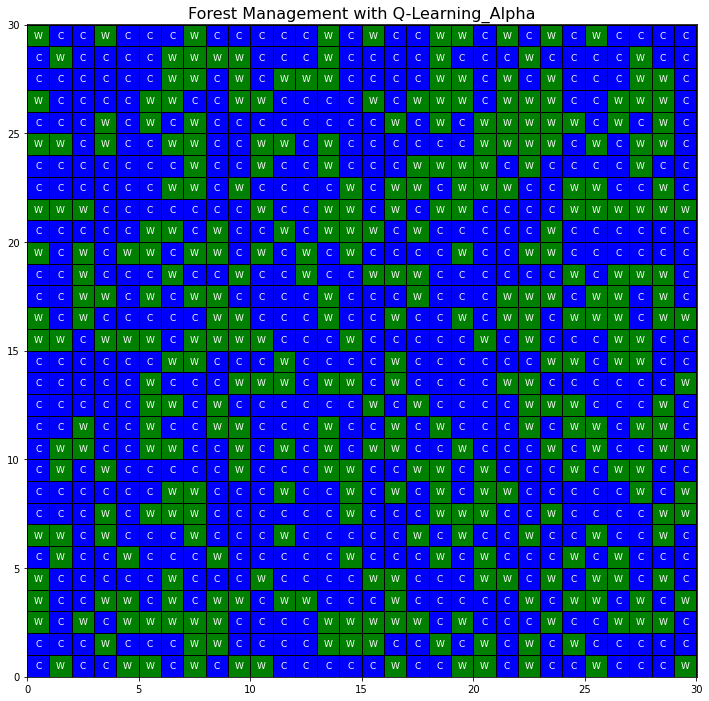

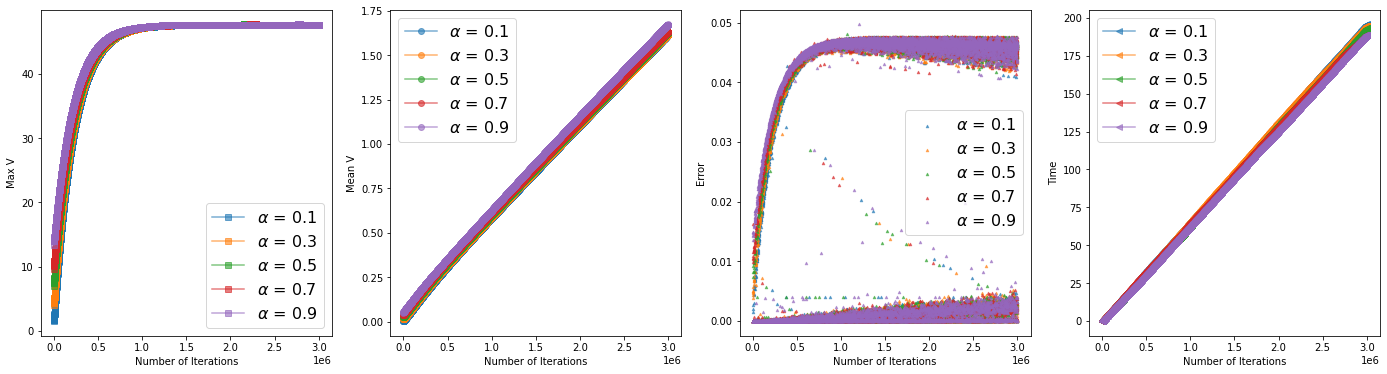

In [81]:
QLearning_Alpha(p, r)

In [82]:
def QLearning_Epsilon(p, r):
    max_vs = []
    mean_vs = []
    errors = []
    iterations = []
    times = []
    policy_list = []
    epsilons = [0, 0.2, 0.4, 0.6, 0.8, 1]
    for epsilon in epsilons:
        ql = mdp.QLearning(p, r, gamma=0.99, alpha=0.1, alpha_decay=0.99, epsilon=epsilon, epsilon_decay=0.99, n_iter=3e6)
        ql.run()
        ql.run_stats
        policy_list.append(ql.policy)
        iterations.append([item['Iteration'] for item in ql.run_stats])
        max_vs.append([item['Max V'] for item in ql.run_stats])
        mean_vs.append([item['Mean V'] for item in ql.run_stats])
        errors.append([item['Error'] for item in ql.run_stats])
        times.append([item['Time'] for item in ql.run_stats])

    max_value = max(max_vs)
    print("Best Reward = " + str(max_value[-1]))
    idx = max_vs.index(max_value)
    plot_env(policy_list[idx], title='Forest Management with Q-Learning_Alpha')

    f, ax = plt.subplots(1,4, figsize=(24,5))

# "Max V"
    for i in range(len(max_vs)):
        ax[0].plot(iterations[i], max_vs[i], alpha=1, marker='s', markersize=6, label="$\epsilon$= {}".format(np.round(epsilons[i],3)))
    ax[0].legend(fontsize=16)
    ax[0].set_xlabel("Number of Iterations")
    ax[0].set_ylabel("Max V", fontsize=16)

# "Mean V" 
    for i in range(len(mean_vs)):
        ax[1].plot(iterations[i], mean_vs[i], alpha=1, marker='o', markersize=6, label="$\epsilon$= {}".format(np.round(epsilons[i],3)))
    ax[1].legend(fontsize=16)
    ax[1].set_xlabel("Number of Iterations")
    ax[1].set_ylabel("Mean V", fontsize=16)

# "Error"
    for i in range(len(errors)):
        ax[2].scatter(iterations[i], errors[i], alpha=1, marker='^', s=6, label="$\epsilon$ = {}".format(np.round(epsilons[i],3)))
    ax[2].legend(fontsize=16)
    ax[2].set_xlabel("Number of Iterations")
    ax[2].set_ylabel("Error")

# "Time"
    for i in range(len(times)):
        ax[3].plot(iterations[i], times[i], alpha=1, marker='<', markersize=6, label="$\epsilon$ = {}".format(np.round(epsilons[i],3)))
    ax[3].legend(fontsize=16)
    ax[3].set_xlabel("Number of Iterations")
    ax[3].set_ylabel("Time")

    plt.plot()

Best Reward = 47.64185726112719


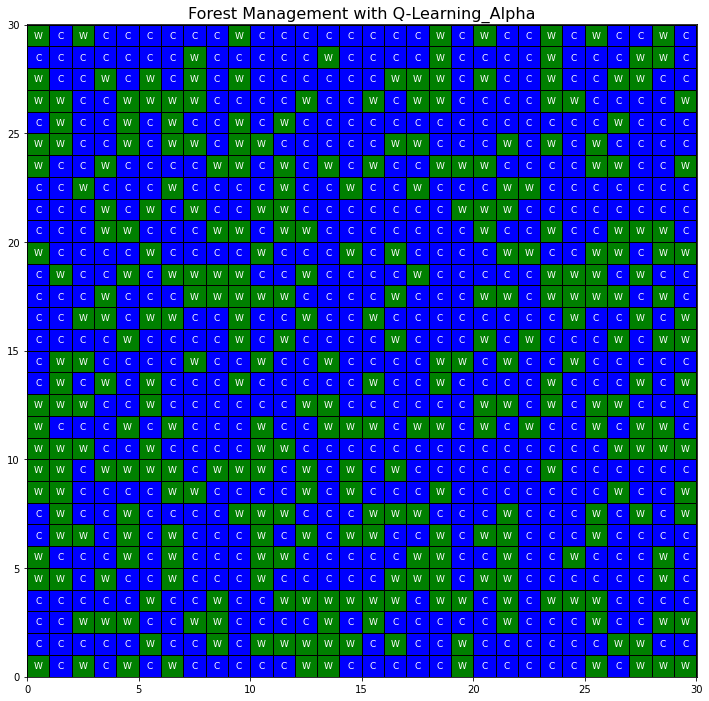

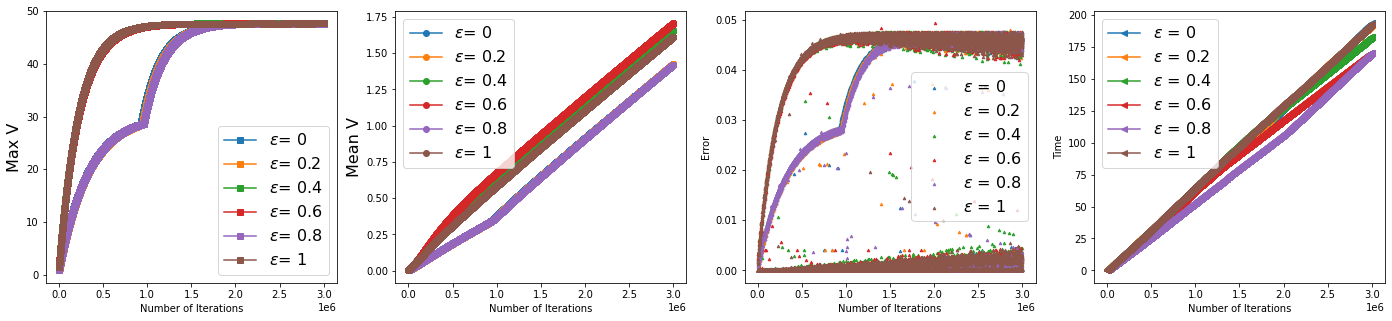

In [83]:
QLearning_Epsilon(p, r)